<a href="https://colab.research.google.com/github/Rohan171819/Machine_Learning_Projects./blob/main/Mall_Customer_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Data=pd.DataFrame(pd.read_csv("Mall_Customers.csv"))

In [ ]:
print(Data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first",sparse=False,dtype=np.int64)
Gender_Number=ohe.fit_transform(Data[["Gender"]])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
Actual_data=np.concatenate((Data,Gender_Number),axis=1)

In [ ]:
Actual_data=pd.DataFrame(Actual_data,columns=["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)","Numerical(Gender)"])

In [ ]:
Actual_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Numerical(Gender)
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


# Exploring the Data

In [ ]:
Actual_data.shape

(200, 6)

In [ ]:
Actual_data.ndim

2

In [ ]:
Actual_data.describe

<bound method NDFrame.describe of     CustomerID  Gender Age Annual Income (k$) Spending Score (1-100)  \
0            1    Male  19                 15                     39   
1            2    Male  21                 15                     81   
2            3  Female  20                 16                      6   
3            4  Female  23                 16                     77   
4            5  Female  31                 17                     40   
..         ...     ...  ..                ...                    ...   
195        196  Female  35                120                     79   
196        197  Female  45                126                     28   
197        198    Male  32                126                     74   
198        199    Male  32                137                     18   
199        200    Male  30                137                     83   

    Numerical(Gender)  
0                   1  
1                   1  
2                   0  
3    

In [ ]:
Actual_data.dtypes

CustomerID                object
Gender                    object
Age                       object
Annual Income (k$)        object
Spending Score (1-100)    object
Numerical(Gender)         object
dtype: object

# Data Visualization

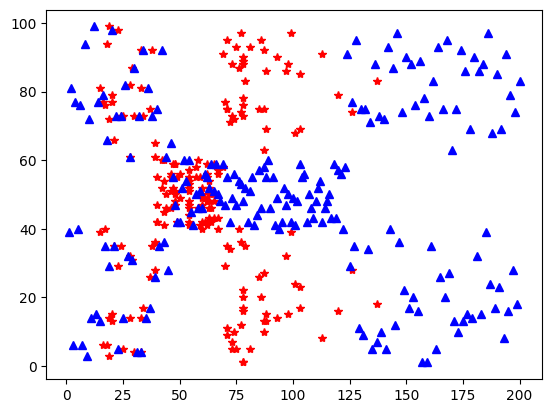

In [ ]:
#Relationship Between Annual Income vs Age and Spending Score.
import matplotlib.pyplot as plt
plt.plot(Data[["Annual Income (k$)"]],Data[["Spending Score (1-100)"]],"r*")
plt.plot(Data[["CustomerID"]],Data[["Spending Score (1-100)"]],"b^")
plt.show()

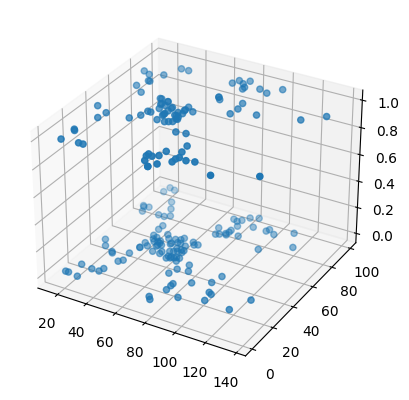

In [ ]:
ax=plt.axes(projection="3d")
ax.scatter(Actual_data[["Annual Income (k$)"]],Actual_data[["Spending Score (1-100)"]],Actual_data[["Numerical(Gender)"]])
plt.show()

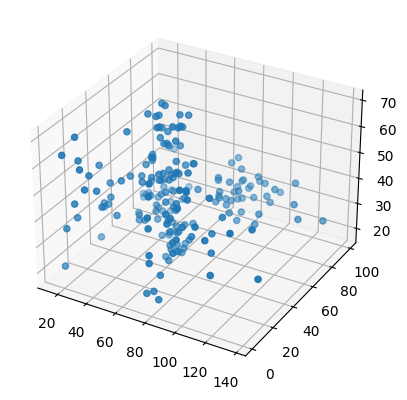

In [ ]:
ax=plt.axes(projection="3d")
ax.scatter(Actual_data[["Annual Income (k$)"]],Actual_data[["Spending Score (1-100)"]],Actual_data[["Age"]])
plt.show()

# KNN

In [ ]:
X=Actual_data.iloc[:,3:5].values

In [ ]:
Y=Actual_data.iloc[:,-1].values
Y=Y.astype('int')


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [ ]:
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

In [ ]:
# Calculating the value of k.
k=np.sqrt(X_train.shape[0])
k
# Assuming that the value of k is 11

12.649110640673518

In [ ]:
k=13

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
Y_Predicted=knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_Predicted)

0.475

In [ ]:
# Anothe way to calculate k value.
accuracy=[]
for a in range(1,31):
  knn=KNeighborsClassifier(n_neighbors=a)
  knn.fit(X_train,Y_train)
  accuracy.append(accuracy_score(Y_test,knn.predict(X_test)))


In [ ]:
print(X_train.shape)

(160, 2)


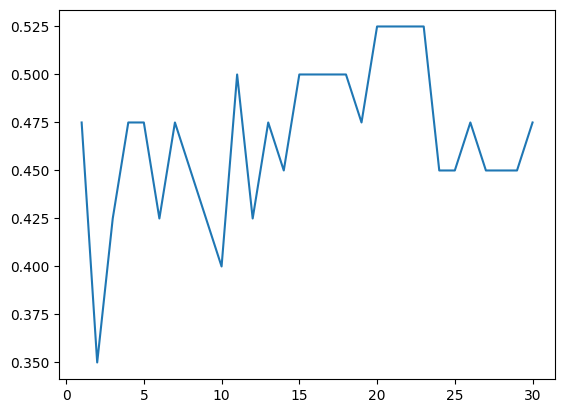

In [ ]:
plt.plot(range(1,31),accuracy)
plt.show()

In [ ]:
# As per the graph k should be equal to 15.
from sklearn.neighbors import KNeighborsClassifier
k2=19
knn2=KNeighborsClassifier(n_neighbors=k2)
knn2.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
Y_Pred=knn2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_Pred)

0.475

In [ ]:
def Predict_Output():
  Age=int(input("Enter the Age:"))
  Annual_Income=int(input("Enter your Annual Income:"))
  Spending_Score=int(input("Enter your Spending Score (1-100):"))
  X_new=np.array([[Age],[Annual_Income],[Spending_Score]]).reshape(1,3)
  X_new=Scaler.transform(X_new)
  if (knn2.predict(X_new)[0]==0):
    return "Female"
  else:
    return "Male"


# Deision Bounadary

In [ ]:
X_train.shape

(160, 2)

Creating Meshgrid

In [ ]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)   #Arranging the values of AnnualIncome.
b=np.arange(start=Y_train.min()-1, stop=Y_train.max()+1)   #Arranging the values as per Gender.
XX,YY=np.meshgrid(a,b)
print(XX.shape)
print(YY.shape)

(3, 687)
(3, 687)


In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T  # So that It should fit for the Training.
input_array

array([[-2.81888029, -1.        ],
       [-2.80888029, -1.        ],
       [-2.79888029, -1.        ],
       ...,
       [ 4.02111971,  1.        ],
       [ 4.03111971,  1.        ],
       [ 4.04111971,  1.        ]])

In [ ]:
labels=knn2.predict(input_array)

<ipython-input-115-fdeaa36639f9>:1: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(XX,YY,labels.reshape(XX.shape),aplha=0.49)


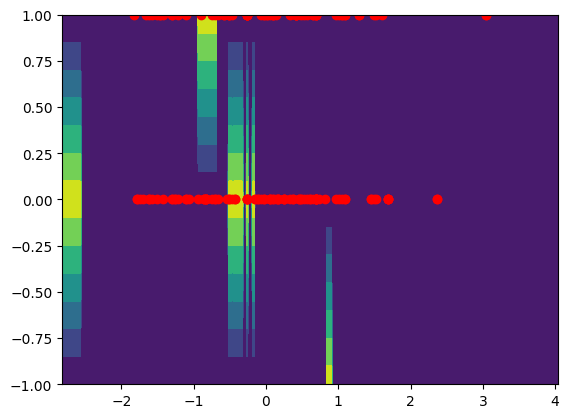

In [ ]:
plt.contourf(XX,YY,labels.reshape(XX.shape),aplha=0.49)
plt.scatter(X_train[:,0],Y_train,c="red")
plt.show()

In [ ]:
a=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)   #Arranging the values of Spending Score.
b=np.arange(start=Y_train.min()-1, stop=Y_train.max()+1)   #Arranging the values as per Gender.
XX2,YY2=np.meshgrid(a,b)
print(XX2.shape)
print(YY2.shape)

(3, 583)
(3, 583)


In [ ]:
input_array=np.array([XX2.ravel(),YY2.ravel()]).T  # So that It should fit for the Training.
input_array

array([[-3.00069851, -1.        ],
       [-2.99069851, -1.        ],
       [-2.98069851, -1.        ],
       ...,
       [ 2.79930149,  1.        ],
       [ 2.80930149,  1.        ],
       [ 2.81930149,  1.        ]])

In [ ]:
labels=knn2.predict(input_array)

<ipython-input-119-3dc1fdf6b2c8>:1: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(XX2,YY2,labels.reshape(XX2.shape),aplha=0.49)


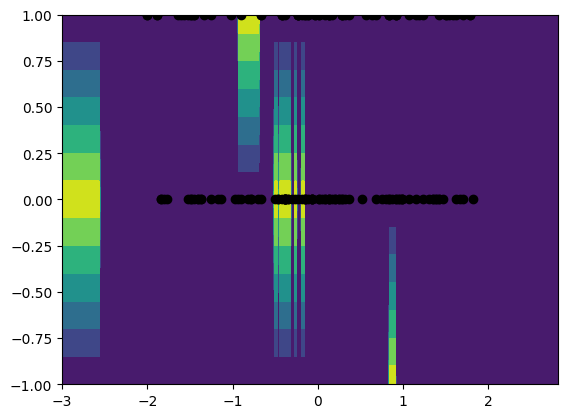

In [ ]:
plt.contourf(XX2,YY2,labels.reshape(XX2.shape),aplha=0.49)
plt.scatter(X_train[:,1],Y_train,c="black")
plt.show()

# Decision Tree

In [ ]:
X=Actual_data.iloc[:,2:5].values
Y=Actual_data.iloc[:,-1].values
Y=Y.astype("int")

In [ ]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X,Y,train_size=0.8,test_size=0.2)
X_train2=Scaler.fit_transform(X_train2)
X_test2=Scaler.fit_transform(X_test2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=3)

In [ ]:
dtc.fit(X_train2,Y_train2)

DecisionTreeClassifier(max_depth=3)

In [ ]:
Y_predicted=dtc.predict(X_test2)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test2,Y_predicted)

0.525

[Text(0.4230769230769231, 0.875, 'x[2] <= -1.377\ngini = 0.491\nsamples = 160\nvalue = [91, 69]'),
 Text(0.15384615384615385, 0.625, 'x[1] <= -1.557\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.23076923076923078, 0.375, 'x[0] <= 0.144\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 1.175\ngini = 0.478\nsamples = 142\nvalue = [86, 56]'),
 Text(0.5384615384615384, 0.375, 'x[0] <= -1.455\ngini = 0.458\nsamples = 121\nvalue = [78, 43]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.44\nsamples = 113\nvalue = [76, 37]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= -0.288\ngini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(0.7692307

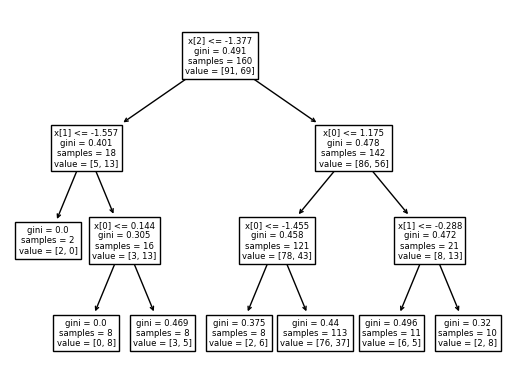

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dtc)

In [ ]:
def Max_Depth_Analyzer(max_depth):
  Data=Actual_data
  X=Actual_data.iloc[:,2:4].values
  Y=Actual_data.iloc[:,-1].values
  Y=Y.astype('int')
  dtc2=DecisionTreeClassifier(max_depth=max_depth)
  dtc2.fit(X,Y)
  a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)   #Arranging the values of AnnualIncome.
  b=np.arange(start=Y_train.min()-1, stop=Y_train.max()+1)   #Arranging the values of Spending Score.
  XX,YY=np.meshgrid(a,b)
  input_array=np.array([XX.ravel(),YY.ravel()]).T  # So that It should fit for the Training.
  labels=dtc2.predict(input_array)
  plt.contourf(XX,YY,labels.reshape(XX.shape))
  plt.scatter(X_train[:,0],Y_train,c=Y_train)
  plt.show()

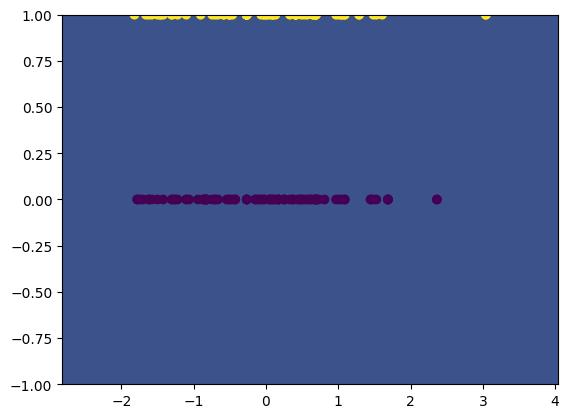

In [ ]:
Max_Depth_Analyzer(max_depth=7)

# Hyper Parameter Tuning

In [ ]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,9,None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dtc,param_grid=param_dist,cv=10)

In [ ]:
grid.fit(X_train2,Y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.60625
{'criterion': 'entropy', 'max_depth': 5}


# SVM

In [ ]:
Actual_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Numerical(Gender)
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


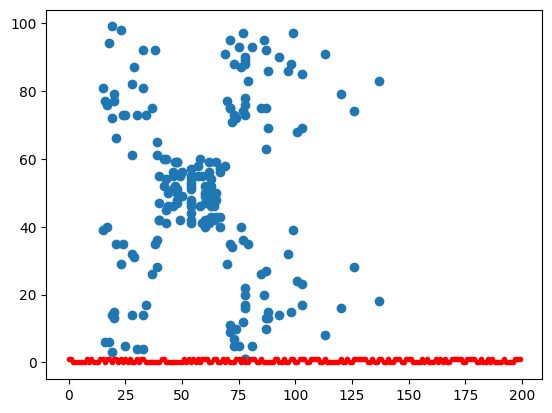

In [ ]:
plt.scatter(Actual_data.iloc[:,3:4],Actual_data.iloc[:,4:5])
plt.plot(Actual_data.iloc[:,5:6],"r.")
plt.show()

In [ ]:
X=Actual_data.iloc[:,3:5].values
Y=Actual_data.iloc[:,-1].values
Y=Y.astype("int")

In [ ]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,Y_train3,Y_test3=train_test_split(X,Y,train_size=0.75,test_size=0.25)
X_train3=Scaler.fit_transform(X_train3)
X_test3=Scaler.fit_transform(X_test3)
print(X_train3.shape)
print(Y_train3.shape)

(150, 2)
(150,)


In [ ]:
from sklearn.svm import SVC
model=SVC(kernel="rbf",C=500)
model.fit(X_train3,Y_train3)

SVC(C=500)

In [ ]:
Y_Predicted2=model.predict(X_test3)
print(Y_Predicted2.shape)
print(Y_test3.shape)

(50,)
(50,)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test3,Y_Predicted2)

0.52

In [ ]:
X=Scaler.fit_transform(X)
data=pd.DataFrame(X,columns=["x1","x2"])
data[["Y"]]=Actual_data[["Numerical(Gender)"]]

In [ ]:
data[["x1_Square"]]=data[["x1"]]**2
data[["x2_Square"]]=data[["x2"]]**2

In [ ]:
c=data.x1*data.x2

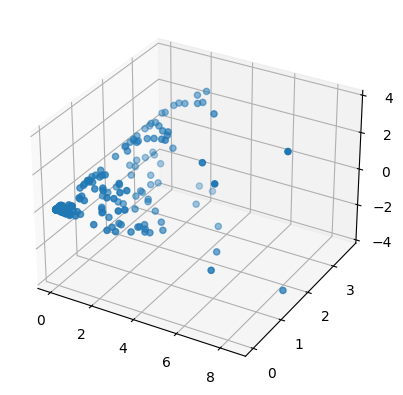

In [ ]:
a=plt.axes(projection="3d")
b=data[["x1_Square"]]*data[["x2_Square"]]
a.scatter3D(data[["x1_Square"]],data[["x2_Square"]],c)
plt.show()

In [ ]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)   #Arranging the values of AnnualIncome.
b=np.arange(start=Y_train.min()-1, stop=Y_train.max()+1)   #Arranging the values as per Gender.
XX,YY=np.meshgrid(a,b)
print(XX.shape)
print(YY.shape)

(3, 687)
(3, 687)


In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T  # So that It should fit for the Training.
input_array

array([[-2.81888029, -1.        ],
       [-2.80888029, -1.        ],
       [-2.79888029, -1.        ],
       ...,
       [ 4.02111971,  1.        ],
       [ 4.03111971,  1.        ],
       [ 4.04111971,  1.        ]])

In [ ]:
from sklearn.svm import SVC
model2=SVC(kernel="rbf")
model2.fit(X_train,Y_train)
labels2=model2.predict(input_array)

<ipython-input-148-5fc50b5cab69>:1: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(XX,YY,labels2.reshape(XX.shape),aplha=0.49)


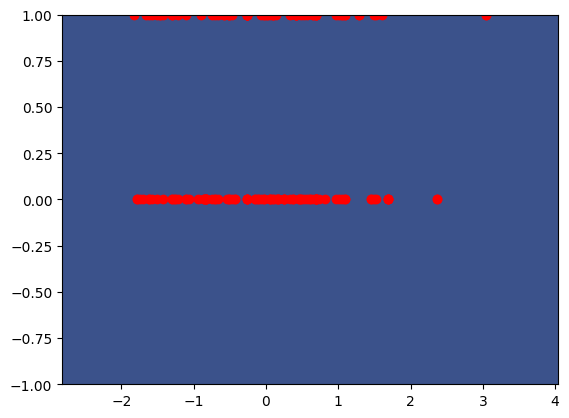

In [ ]:
plt.contourf(XX,YY,labels2.reshape(XX.shape),aplha=0.49)
plt.scatter(X_train[:,0],Y_train,c="red")
plt.show()

In [ ]:
a=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)   #Arranging the values of Spending Score.
b=np.arange(start=Y_train.min()-1, stop=Y_train.max()+1)   #Arranging the values as per Gender.
XX,YY=np.meshgrid(a,b)
print(XX.shape)
print(YY.shape)

(3, 583)
(3, 583)


In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T  # So that It should fit for the Training.
input_array

array([[-3.00069851, -1.        ],
       [-2.99069851, -1.        ],
       [-2.98069851, -1.        ],
       ...,
       [ 2.79930149,  1.        ],
       [ 2.80930149,  1.        ],
       [ 2.81930149,  1.        ]])

In [ ]:
from sklearn.svm import SVC
model3=SVC(kernel="poly",C=500)
model3.fit(X_train,Y_train)
labels3=model3.predict(input_array)

<ipython-input-152-f64346f8d962>:1: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(XX,YY,labels3.reshape(XX.shape),aplha=0.49)


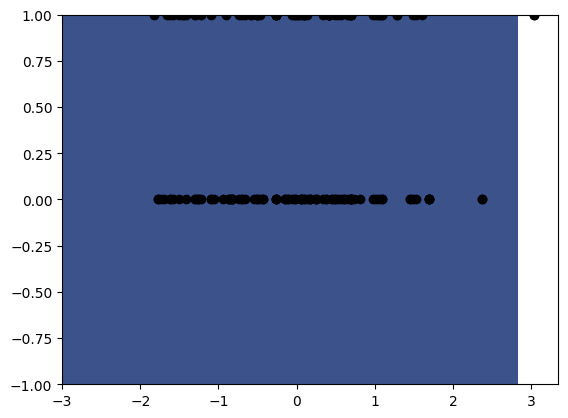

In [ ]:
plt.contourf(XX,YY,labels3.reshape(XX.shape),aplha=0.49)
plt.scatter(X_train[:,0],Y_train,c="black")
plt.show()

In [ ]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)   #Arranging the values of AnnualIncome.
b=np.arange(start=Y_train.min()-1, stop=Y_train.max()+1)   #Arranging the values as per Gender.
XX,YY=np.meshgrid(a,b)
print(XX.shape)
print(YY.shape)

(3, 687)
(3, 687)


In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T  # So that It should fit for the Training.
input_array

array([[-2.81888029, -1.        ],
       [-2.80888029, -1.        ],
       [-2.79888029, -1.        ],
       ...,
       [ 4.02111971,  1.        ],
       [ 4.03111971,  1.        ],
       [ 4.04111971,  1.        ]])

In [ ]:
from sklearn.svm import SVC
model4=SVC(kernel="sigmoid",C=500)
model4.fit(X_train,Y_train)
labels4=model4.predict(input_array)

<ipython-input-156-9c249af9991c>:1: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(XX,YY,labels4.reshape(XX.shape),aplha=0.49)


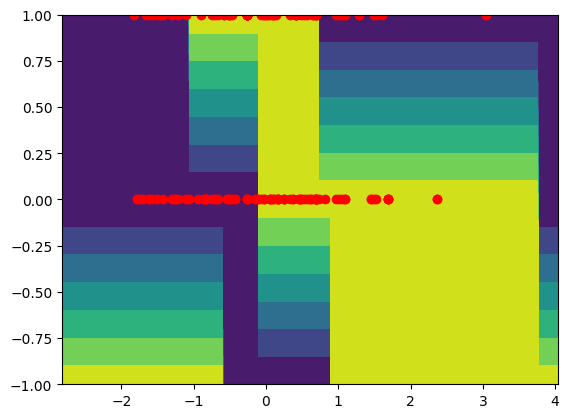

In [ ]:
plt.contourf(XX,YY,labels4.reshape(XX.shape),aplha=0.49)
plt.scatter(X_train[:,0],Y_train,c="red")
plt.show()